First you need to load all the necessary libraries for loading the data preprocessing and then making and validatation of the model


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


Load the data into training data and testing data from the keras datatsets

In [15]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()


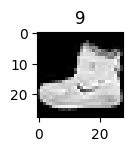

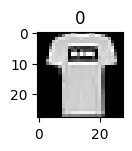

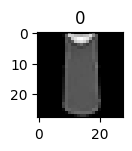

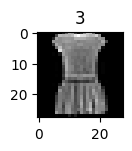

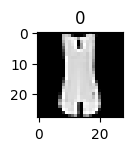

In [16]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(Y_train[i])
  plt.show()

Now after loading the data normalization is required to force the system not to be biased against some inputs than other inputs

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0

After the data normalization creation of the model will be the next step> to create the model import the model the layers and then the assign the data particularly the shape of the data
As this model only needs to have 1 hidden layer the number of neurons could be any but to compare the results with other models have the same number of nuerons and same other hyperparameters.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
model_1=Sequential([
    Flatten(input_shape=(28,28),),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


After defining the model define how the model will be compiled at the time of training basically how the model will update its variables (to minimize loss).
Same as above dont change the hyperparameters in this to as we need to compare the results with other models and it could cloud the purpose if we change other hyperparameters

In [19]:

optimizer='adam'
model_1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
import time

Now after defining the model and compiling it need to train the model with the training data

In [21]:
start=time.process_time()

epoch=10
loss=[]
test_accuracy=[]
e=[]
for i in range(epoch):
  model_1.fit(X_train,Y_train,batch_size=64)
  per_loss,per_test_accuracy=model_1.evaluate(X_test,Y_test)
  loss.append(per_loss)
  test_accuracy.append(per_test_accuracy)
  e.append(i+1)
end=time.process_time()
print("time taken=",end-start)



938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7741 - loss: 0.6650
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.4453
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.3903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3867
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8749 - loss: 0.3492
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3902
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8815 - loss: 0.3278
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8691 - loss: 0.3592
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8902 - loss: 0.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3618
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8938 - loss: 0.2901
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3647
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8969 - loss: 0.2766
313/313 ━━━━━━━━━━━━━━━━━

In [22]:
l,a=model_1.evaluate(X_test,Y_test)
print("loss=",l)
print("accuracy=",a)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.3337
loss= 0.34019553661346436
accuracy= 0.879800021648407


<ipython-input-23-93f8c450626b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


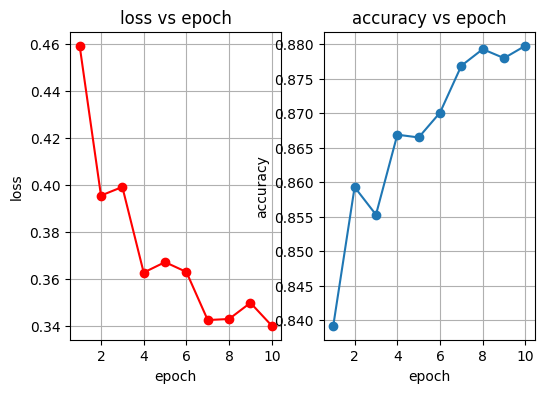

In [23]:
plt.figure(figsize=(6,4))
plt.title("Accuracy and Loss")

plt.subplot(1,2,1)
plt.title('loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.plot(e,loss,marker='o',color='red')
plt.subplot(1,2,2)
plt.title('accuracy vs epoch')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(e,test_accuracy,marker='o')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


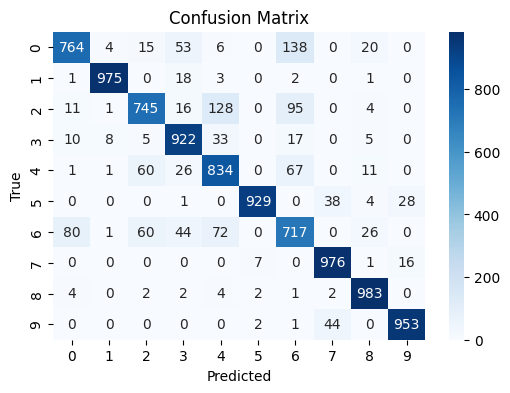

In [32]:


from sklearn.metrics import confusion_matrix


y_pred = model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(Y_test, y_pred_classes)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()